In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sys, csv, pdb, os

In [9]:
sr = 44100
audio_folder = './wavs/'
pitch_folder = './pitch/'


wav_paths=[]
for r,d,files in os.walk(audio_folder):
    for file in files:
        wav_paths.append(os.path.join(r, file))

pitch_paths=[]
for r,d,files in os.walk(pitch_folder):
    for file in files:
        pitch_paths.append(os.path.join(r, file))

In [10]:
wav_paths

['./wavs/aeiouHigh.wav',
 './wavs/aeiouLow.wav',
 './wavs/aeiouAsc.wav',
 './wavs/aeiouDes.wav',
 './wavs/forest.wav']

In [3]:
tester = pitch_paths[0]
print(tester)
tester = np.load(tester)
tester

./pitch/p260_311_mic2..npy


array([[0.075432  , 0.01180197, 0.11230426, ..., 0.16842881, 0.15228291,
        0.14157486],
       [0.08367307, 0.05058784, 0.09262269, ..., 0.16218065, 0.17208867,
        0.1605722 ],
       [0.06479739, 0.06720996, 0.03273043, ..., 0.13279906, 0.1573426 ,
        0.16257456],
       ...,
       [0.184317  , 0.15428972, 0.13318743, ..., 0.15818901, 0.17137071,
        0.1496093 ],
       [0.18518022, 0.10159572, 0.087948  , ..., 0.17595923, 0.15037987,
        0.13667965],
       [0.25644833, 0.20760863, 0.19848987, ..., 0.1517771 , 0.15159398,
        0.15134963]], dtype=float32)

In [4]:
print(pitch_paths)
print(wav_paths)

['./pitch/p260_311_mic2..npy', './pitch/p249_285_mic1..npy', './pitch/p250_024_mic2..npy', './pitch/p304_396_mic2..npy', './pitch/p316_136_mic2..npy', './pitch/p326_283_mic2..npy', './pitch/p318_074_mic1..npy', './pitch/p306_104_mic2..npy', './pitch/p264_294_mic1..npy', './pitch/p306_287_mic1..npy', './pitch/p256_143_mic2..npy', './pitch/p256_194_mic1..npy', './pitch/p252_234_mic2..npy', './pitch/p336_103_mic1..npy', './pitch/p255_016_mic2..npy', './pitch/p305_395_mic2..npy', './pitch/p258_190_mic1..npy', './pitch/p286_464_mic2..npy', './pitch/p257_073_mic1..npy', './pitch/p345_328_mic2..npy', './pitch/p283_264_mic1..npy', './pitch/p335_030_mic1..npy', './pitch/p329_183_mic2..npy', './pitch/p323_271_mic1..npy', './pitch/p261_033_mic2..npy', './pitch/p238_130_mic1..npy', './pitch/p272_370_mic2..npy', './pitch/p259_154_mic2..npy', './pitch/p269_318_mic1..npy', './pitch/p330_382_mic1..npy', './pitch/p299_188_mic2..npy', './pitch/p318_252_mic2..npy', './pitch/p285_141_mic1..npy', './pitch/

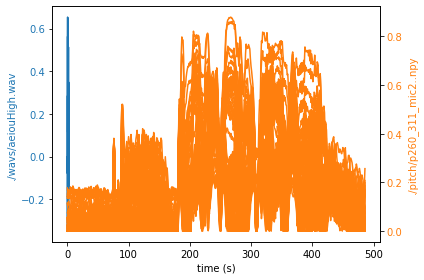

<Figure size 1440x288 with 0 Axes>

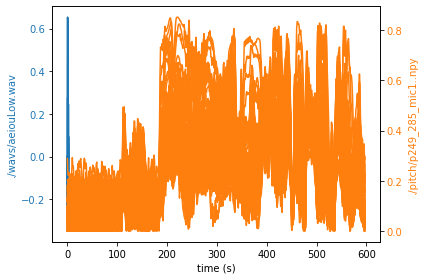

<Figure size 1440x288 with 0 Axes>

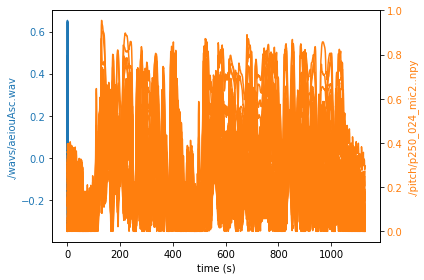

<Figure size 1440x288 with 0 Axes>

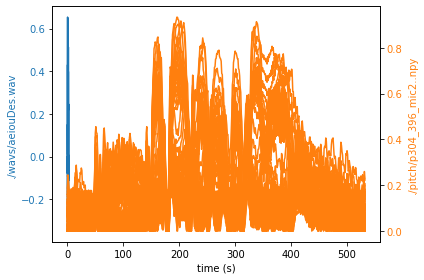

<Figure size 1440x288 with 0 Axes>

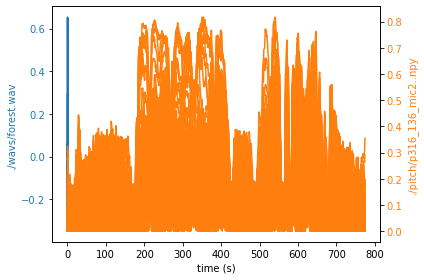

<Figure size 1440x288 with 0 Axes>

IndexError: list index out of range

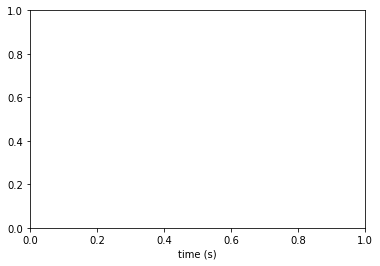

In [14]:
for i in range(len(pitch_paths)):
#     audio_path=wav_paths[i]
    pitch_contour=np.load(pitch_paths[i])
    
    audio, y = librosa.load(audio_path, sr=sr)

    x_values=[]
    y_values=[]

#     contour_path = sys.argv[2]
#     with open(contour_path, 'r') as contourCsv:
#         reader = csv.reader(contourCsv)
#         for row in reader:
#             x_values.append(float(row[0]))
#             y_values.append(int(float(row[1])))
#             print(float(row[0]), int(float(row[1])))

    total_entries =len(audio)
    total_time = total_entries/sr
    time_axis = np.linspace(0, total_time, total_entries)

    fig, ax1 = plt.subplots()

    color = 'tab:blue'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel(wav_paths[i], color=color)
    ax1.plot(time_axis, audio, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:orange'
    ax2.set_ylabel(pitch_paths[i], color=color)
    ax2.plot(pitch_contour, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.figure(figsize=(20, 4))
    plt.show()

In [7]:
import pickle
asd = pickle.load(open('./model_data/1HotL1Loss/config.pkl', 'rb'))
asd

Namespace(adam_init=0.0001, batch_size=2, ckpt_freq=50000, data_dir='./spmel', dim_emb=20, dim_neck=32, dim_pre=512, file_name='1HotL1Loss', freq=32, lambda_cd=1, len_crop=128, load_ckpts='', log_step=10, num_iters=100000, one_hot=True, prnt_loss_weight=1.0, psnt_loss_weight=1.0, shape_adapt=True, spec_freq=10000, train_size=20, which_cuda=0)

In [8]:
zxc = pickle.load(open('./model_data/1HotAdam00001/config.pkl', 'rb'))
zxc

Namespace(adam_init=1e-05, batch_size=2, ckpt_freq=50000, data_dir='./spmel', dim_emb=20, dim_neck=32, dim_pre=512, file_name='1HotAdam00001', freq=32, lambda_cd=1, len_crop=128, load_ckpts='', log_step=10, num_iters=100000, one_hot=True, prnt_loss_weight=1.0, psnt_loss_weight=1.0, shape_adapt=True, spec_freq=10000, train_size=20, which_cuda=1)